Enter name(s) here: Andrew Vuong, Henry Wang, Aaron Johnson

# Group Project

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. In this assigment you'll explore how to train various classifiers using the `scikit-learn` library. The scikit-learn documentation can be found [here](http://scikit-learn.org/stable/documentation.html).

In this assignment we'll attempt to classify patients as either having or not having diabetic retinopathy, using the same Diabetic Retinopathy data set from your previous assignments. Recall that this dataset contains 1151 records and 20 attributes (some categorical, some continuous). You can find additional details about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).

In [35]:
#You may add additional imports
import warnings
#warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time

In [36]:
%matplotlib inline

In [39]:
# Read the data from csv file

data = pd.read_csv("Quality_control_cervical_cytology1.csv", delimiter='\t', header=0)
# print(data.head(10))
for i,row in data.iterrows():
    if row[5].isna():
        print('yes')
    data.at[i,'Age'] = 100
#     data.set_value(i, 'age',100)
#     data.loc[i,'age'] = 100
#     data.ix[i,'age'] = 100
#     data.iloc[i, 'age'] = 100
#     print(row[0])
# for i in data['age']:
#     print(i)
print(data.head(10))
# def change_neg_to_nan(x):
#     if x == -1:
#         x = n
# data[['SEE_01']] = data.apply(change_neg_to_nan, axis=1)

df_full = data.groupby(['study_gr', 'study_gr1', 'Diag_cyt', 'Diag_cyt_rev'])
test = list(df_full.groups[4,5,3,3])

df_full_prob = df_full.mean()
# print(df_full_prob)
# print(df_full_prob.keys())
# print(df_full_prob['SEE_01'])

# for k in df_full_prob.keys():
#     print(k)

# test1 = list(df_full.groups[1,1,-1,-1])
# print(test)

AttributeError: 'numpy.float64' object has no attribute 'isna'

### A. Data prep

In [125]:
print(data.shape)
# print(df_full.groups[1.0,1.0,-1.0,-1.0])
count = 0
correct = 0
for index, row in data.iterrows():
    try:
        df_full.groups[row[1],row[2],row[3],row[4]]
#         df_full.groups[-5,-5,-5,-5]
#         correct += 1
    except:
#         print(df_full[row[1],row[2],row[3],row[4]])
        count += 1
print(count)
# print(correct)
print(df_full.groups[3,4,1,1])

(4366, 11)
0
Int64Index([3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854,
            ...
            4285, 4286, 4287, 4288, 4289, 4292, 4293, 4294, 4295, 4296],
           dtype='int64', length=370)


Q1. All of the classifiers in `scikit-learn` require that you separate the feature columns from the class label column, so go ahead and do that first. You should end up with two separate data frames: one that contains all of the feature values and one that contains the class labels. 

Note: Later in this assignment, you may get a warning stating "a column-vector was passed when a 1d array was expected." This indicates that some function wants a _flat array_ of labels, rather than a 2D DataFrame of labels. You can go ahead and transform the labels into a flat array here by doing either `labels.values.ravel()` or `labels.iloc[:,0]`. And you can just use that flat array for everything.

Print the `shape` of your features data frame, the shape or len of your labels dataframe or array, and the `head` of the features data frame.

In [53]:
# your code goes here
dataonly = data.drop(['biop_status'], axis=1)
# print(dataonly)

labels = data['biop_status'].values.ravel()
# print(labels)

print(dataonly.shape)
print(dataonly.head(10))


(4366, 10)
   Age  study_gr  study_gr1  Diag_cyt  Diag_cyt_rev  SEE_01  SEE_16  SEE_18  \
0   34         1          1         0             0      -1     NaN     NaN   
1   31         1          1         0             0      -1     NaN     NaN   
2   25         1          1         0             0      -1     NaN     NaN   
3   33         1          1         0             0      -1     NaN     NaN   
4   27         1          1         0             0      -1     NaN     NaN   
5   24         1          1         0             0      -1     NaN     NaN   
6   30         1          1         0             0      -1     NaN     NaN   
7   26         1          1         0             0      -1     NaN     NaN   
8   30         1          1         0             0      -1     NaN     NaN   
9   38         1          1         0             0      -1     NaN     NaN   

   SEE_45  Ind_biop  
0     NaN         0  
1     NaN         1  
2     NaN         1  
3     NaN         0  
4     NaN

### B. Decision Trees (DT) & Cross Validation

**Train/Test Split**

Q2. You can train a classifier using the holdout method by splitting your data into a  training set and a  test set, then you can evaluate the classifier on the held-out test set. 

Let's try this with a decision tree classifier. 

* Use `sklearn.model_selection.train_test_split` to split your dataset into training and test sets (do an 80%-20% split). Display how many records are in the training set and how many are in the test set.
* Use `sklearn.tree.DecisionTreeClassifier` to fit a decision tree classifier on the training set. Use entropy as the split criterion. 
* Now that the tree has been learned from the training data, we can run the test data through and predict classes for the test data. Use the `predict` method of `DecisionTreeClassifier` to classify the test data. 
* Then use `sklearn.metrics.accuracy_score` to print out the accuracy of the classifier on the test set.

In [5]:
# your code goes here
from sklearn.model_selection import train_test_split  #, DecisionTreeClassifier
train_x, test_x, train_y, test_y = train_test_split(dataonly, labels, test_size=0.2, random_state=42)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(920, 19)
(231, 19)
(920,)
(231,)


Q3. Note that the DecisionTree classifier has many parameters that can be set. Try tweaking parameters like split criterion, max_depth, min_impurity_decrease, min_samples_leaf, min_samples_split, etc. to see how they affect accuracy. Print the accuracy of a few different variations.

In [6]:
# your code goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=0, criterion='gini') 
dtree.fit(train_x, train_y)
prediction = dtree.predict(test_x)
print("for random state=0 and using gini: {}".format(accuracy_score(prediction, test_y)))
dtree = DecisionTreeClassifier(random_state=0, criterion='entropy') 
dtree.fit(train_x, train_y)
prediction = dtree.predict(test_x)
print("for random state=0 and using entropy: {}".format(accuracy_score(prediction, test_y)))
dtree = DecisionTreeClassifier(random_state=42, criterion='gini') 
dtree.fit(train_x, train_y)
prediction = dtree.predict(test_x)
print("for random state=42 and using gini: {}".format(accuracy_score(prediction, test_y)))


for random state=0 and using gini: 0.6363636363636364
for random state=0 and using entropy: 0.6017316017316018
for random state=42 and using gini: 0.658008658008658


**Cross Validation**

Q4. You have now built a decision tree and tested it's accuracy using the "holdout" method. But as discussed in class, this is not sufficient for estimating generalization accuracy. Instead, we should use Cross Validation to get a better estimate of accuracy. 

Use `sklearn.model_selection.cross_val_score` to perform 10-fold cross validation on a decision tree. You will pass the FULL dataset into `cross_val_score` which will automatically divide it into the number of folds you tell it to, train a decision tree model on the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the accuracy out of each fold. Average these accuracies to print out the generalization accuracy of the model.

In [7]:
# your code goes here
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtree, dataonly, labels, cv=10, n_jobs=-1))

[0.59482759 0.6        0.56521739 0.55652174 0.64347826 0.65217391
 0.6173913  0.57391304 0.63478261 0.6       ]


**Nested Cross Validation**

Q5. Now we want to tune our model to use the best parameters to avoid overfitting to our training data. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters (hyperparameters) specified in a grid. 
* Use `sklearn.model_selection.GridSearchCV` to find the best `max_depth`, `max_features`, and `min_samples_leaf` for your tree. Use a 5-fold-CV and 'accuracy' for the scoring criteria.
* Try the values [5,10,15,20] for `max_depth` and `min_samples_leaf`. Try [5,10,15] for `max_features`. 
* Print out the best value for each of the tested parameters (`best_params_`).
* Print out the accuracy of the model with these best values (`best_score_`).

In [8]:
# your code goes here
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
max_depth = [5,10,15,20]
min_samples_leaf = [5,10,15,20]
max_features = [5,10,15]
param_grid = {'max_depth':max_depth, 'min_samples_leaf': min_samples_leaf, 'max_features':max_features}
cv = 5
dtreeGSCV = GridSearchCV(dtree,param_grid,cv=cv)
dtreeGSCV.fit(train_x, train_y)
print('The scikit-learn version is {}\n'.format(sk.__version__))
print("best parameters:\nmax_depth: {}\nmax_features: {}\nmin_samples_leaf: {}\n".format(\
dtreeGSCV.best_params_['max_depth'],\
dtreeGSCV.best_params_['max_features'],\
dtreeGSCV.best_params_['min_samples_leaf']))
print("best score: {}".format(dtreeGSCV.best_score_))

The scikit-learn version is 0.21.3

best parameters:
max_depth: 5
max_features: 15
min_samples_leaf: 10

best score: 0.6478260869565218


Q6. What you did in Q5 performed the _inner_ loop of a nested CV (no test set was held out). What you did in Q4 performed an _outer_ loop of CV (holds out a test set). Now we need to combine them to perform the nested cross-validation that we discussed in class. To do this, you'll need to pass the a `GridSearchCV` into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first outer fold, and it passes the train set into `GridSearchCV`. `GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). This best decision tree is then evaluated with the test set from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

Be patient for this one to run. The nested cross-validation loop can take some time. A [ * ] next to the cell indicates that it is still running.

Print the accuracy of your tuned, cross-validated model. This is the official accuracy that you would report for your model.

In [9]:
# your code goes here
print(cross_val_score(dtreeGSCV, train_x, train_y, cv=10, n_jobs=-1))

[0.6344086  0.60215054 0.59139785 0.61956522 0.65217391 0.58695652
 0.66304348 0.53846154 0.68131868 0.61538462]


### C. Naive Bayes (NB) & Evaluation Metrics

`sklearn.naive_bayes.GaussianNB` implements the Gaussian Naive Bayes algorithm for classification. This means that the liklihood of continuous features is estimated using a Gaussian distribution. (Refer to slide 13 of the Naive Bayes powerpoint notes.)

Q7. Create a `sklearn.naive_bayes.GaussianNB` classifier. Use `sklearn.model_selection.cross_val_score` to do a 10-fold cross validation on the classifier. Display the accuracy.

In [10]:
# your code goes here
from sklearn.naive_bayes import GaussianNB # then cross_val_score
modelNB = GaussianNB()
modelNB.fit(train_x, train_y)
print(cross_val_score(modelNB, train_x, train_y, cv=10, n_jobs=-1))


[0.61290323 0.60215054 0.58064516 0.58695652 0.61956522 0.59782609
 0.61956522 0.59340659 0.63736264 0.58241758]


Q8. `cross_val_score` returns the scores of every test fold. There is another function called `cross_val_predict` that returns predicted y values for every record in the test fold. In other words, for each element in the input, `cross_val_predict` returns the prediction that was obtained for that element when it was in the test set. 

* Use `cross_val_predict` and `sklearn.metrics.confusion_matrix` to print the confusion matrix for the classifier.

* Sckit-learn also provides a useful function `sklearn.metrics.classification_report` for evaluating the classifier on a per-class basis. It is a summary of the precision, recall, and F1 score for each class (and support is just the actual class count). Display the classification report for your Naive Bayes classifier.

In [11]:
# your code goes here
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict


predict = cross_val_predict(modelNB, train_x, train_y, cv=10, n_jobs=-1)
true = train_y
print("Confusion Matrix:\n{}\n".format(confusion_matrix(true, predict)))
print("Classification Report:\n{}\n".format(classification_report(true, predict)))


Confusion Matrix:
[[407  30]
 [335 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.93      0.69       437
           1       0.83      0.31      0.45       483

    accuracy                           0.60       920
   macro avg       0.69      0.62      0.57       920
weighted avg       0.70      0.60      0.56       920




Q9. Using `sklearn.metrics.roc_curve` plot a ROC curve for the Naive Bayes classifier. Also calculate the area under the curve (AUC) using `sklearn.metrics.roc_auc_score`.

* We will just do this on a single holdout test set (because it gets more complicated to put this inside of a cross-validation). So, split your data into training and test sets using `sklearn.model_selection.train_test_split`. Do an 80/20 split.
* Fit the Naive Bayes classifier to the training data by calling the `fit` method on the trainng data.
* Now call the `predict_proba` method on your classifier and pass in the test data. This will return a 2D numpy array with one row for each datapoint in the test set and 2 columns. Column index 0 is the probability that this datapoint is in class 0, and column index 1 is the probability that this datapoint is in class 1.
* We are going to say that class 1 (having the disease) is the rare/positive class. To create a ROC curve, pass the actual Y labels and the probabilites of class 1 (column index 1 out of your predict_proba result) into `sklearn.metrics.roc_curve`
* Pass the FPR and TPR that `roc_curve` returns into the plotting code that we have provided you.
* Print the AUC (area under the curve) by using `sklearn.metrics.roc_auc_score`

roc_auc_score: 0.717460558252427


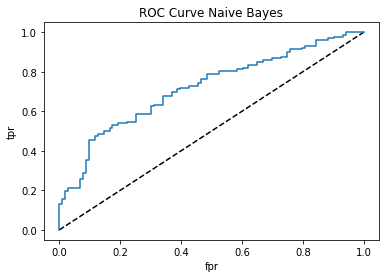

In [12]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm.libsvm import predict_proba
# your code goes here
# train_x, test_x, train_y, test_y split already above

modelNB.fit(train_x, train_y)

predict_proba_results = modelNB.predict_proba(test_x)
# print(predict_proba_results)

#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, thres = [], [], []
fpr, tpr, thres = roc_curve(test_y, predict_proba_results[:,1])
# print(predict_proba_results[:,1])
# print((predict_proba_results))
print("roc_auc_score: {}".format(roc_auc_score(test_y, predict_proba_results[:,1])))
# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

### D. k-Nearest Neighbor (KNN) & Pipelines 

For some classification algorithms, scaling of the data is critical (like KNN, SVM, Neural Nets). For other classification algorithms, data scaling is not necessary (like Naive Bayes and Decision Trees). _Take a minute to think about why this is the case!!_ But using scaled data with an algorithm that doesn't explicitly need it to be scaled does not hurt the results of that algorithm.

Q10. The distance calculation method is central to the KNN algorithm. By default, `KNeighborsClassifier` uses  Euclidean distance as its metric (but this can be changed). Because of the distance calculations, it is critical to scale the data before running Nearest Neighbor!

We discussed why dimensionality reduction may also be needed with KNN because of the curse of dimensionality. So we may want to also perform a dimensionality reduction with PCA before running KNN. PCA should only be performed on scaled data! (Remember that you can also reduce dimensionality by performing feature selection and feature engineering.) 

An important note about scaling data and dimensionality reduction is that they should only be performed on the **training** data, then you transform the test data into the scaled, PCA space that was found on the training data. (Refer to the concept of [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).)

So when you are doing cross-validation, the scaling and PCA needs to happen *inside of your CV loop*. This way, it is performed on the training set for the first fold, then the test set is put into that space. On the second fold, it is performed on the trainng set for the second fold, and the test set is put into that space. And so on for the remaining folds. 

In order to do this with scikit-learn, you must create what's called a `Pipeline` and pass that in to the cross validation. This is a very important concept for Data Mining and Machine Learning, so let's practice it here.

Do the following:
* Create a `sklearn.preprocessing.StandardScaler` object to standardize the dataset’s features (mean = 0 and variance = 1). (Do not call `fit` on it yet. Just create the `StandardScaler` object.)
* Create a `sklearn.decomposition.PCA` object to perform PCA dimensionality reduction. (Do not call `fit` on it yet. Just create the `PCA` object.)
* Create a `sklearn.neighbors.KNeighborsClassifier`. The number of neighbors defaults to 5 (k=5). Go ahead and change it to 7. (Do not call `fit` on it yet. Just create the `KNeighborsClassifier` object.)
* Create a `sklearn.pipeline.Pipeline` object and set the `steps` to the scaler, the PCA, and the KNN objects that you just created. 
* Pass the `pipeline` object in to a `cross_val_score` as the estimator, along with the features and the labels, and use a 5-fold-CV. 

In each fold of the cross validation, the training phase will use _only_ the training data for scaling, PCA, and training the model. Then the testing phase will scale & transform the test data into the PCA space (found on the training data) and run the test data through the trained classifier, to return an accuracy measurement for each fold. Print the average accuracy across all 5 folds. 

In [13]:
# your code goes here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA()
knc = KNeighborsClassifier(n_neighbors=7)
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('pca', PCA()), 
                       ('knc', KNeighborsClassifier(n_neighbors=7))])
print(cross_val_score(pipe, train_x, train_y, cv=5, n_jobs=-1))

[0.61621622 0.60540541 0.5326087  0.65027322 0.64480874]


Q11. Another important part of KNN is choosing the best number of neighbors (tuning the hyperparameter, k). We can use nested cross validation to do this. Let's try k values from 1-25 to find the best one. 

We _also_ want to find the best number of dimensions to project down onto using PCA. We can use nested cross validation to do this as well. Let's try from 5-19 dimensions.

* Starter code is provided to create the "parameter grid" to search. You will need to change this code! Where I have "knn__n_neighbors", this indicates that I want to tune the "n_neighbors" parameter in the "knn" part of the pipeline. When you created your pipeline above, you named the KNN part of the pipeline with a string. You should replace "knn" in the param_grid below with whatever you named your KNN part of the pipeline: **<replace_this>__n_neighbors.** Do the same for the PCA part of the pipeline.
* Create a `sklearn.model_selection.GridSearchCV` and pass in the pipeline, the param_grid, and set it to a 5-fold-CV.
* Now, on that `GridSearchCV` object, call `fit` and pass in the features and labels.
* Show the best number of dimensions and best number of neighbors for this dataset by printing the `best_params_` from the `GridSearchCV`.
* Also print the accuracy when using this best number of dimensions and neighbors by printing the `best_score_` from the `GridSearchCV`.

Be patient, this can take some time to run. It is trying every combination of dimensions from 5-19 with every k from 1-25! A [ * ] next to the cell indicates that it is still running.

In [14]:
'''
On the "pca" part of the pipeline, 
tune the n_components parameter,
by trying the values 1-19.

On the "knn" part of the pipeline, 
tune the n_neighbors parameter,
by trying the values 1-30.
'''
# print(pipe.get_params().keys())
param_grid = {
    'pca__n_components': list(range(5, 19)),
    'knc__n_neighbors': list(range(1, 25))
}

# your code goes here
cv = 5
knnGSCV = GridSearchCV(pipe,param_grid,cv=cv)
knnGSCV.fit(train_x, train_y)
print('The scikit-learn version is {}\n'.format(sk.__version__))
print("best parameters:\n'pca_ncomponents': {}\n'knc_nneighbors': {}\n".format(\
knnGSCV.best_params_['pca__n_components'],\
knnGSCV.best_params_['knc__n_neighbors']))
print("best score: {}".format(knnGSCV.best_score_))



The scikit-learn version is 0.21.3

best parameters:
'pca_ncomponents': 14
'knc_nneighbors': 20

best score: 0.6478260869565218


/u/forever/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Q12. In Q11, we did not hold out a test set. The accuracy reported out is on the _validation_ set. So now we need to wrap the whole process in another cross-validation to perform a nested cross-validation and report the accuarcy of this KNN model on unseen test data. This is the official accuracy you would report on this model.

You'll need to pass the `GridSearchCV` into a `cross_val_score`, just as you did with the decision tree. Use a 5-fold-CV for the outer loop. 

Again, be patient for this one to run. The nested cross-validation loop can take some time. It is doing what it did above in Q11 five times. A [ * ] next to the cell indicates that it is still running. (Just for comparison, mine takes about 2 mins to run and the fan revs up so it sounds like my computer is going to explode. All computers are different, so yours could take shorter or longer...)

<img src="model_is_training.png" width="250">

In [15]:
# your code goes here
print(cross_val_score(knnGSCV, train_x, train_y, cv=5, n_jobs=-1))

[0.67567568 0.58378378 0.58152174 0.66120219 0.68852459]


### E. Support Vector Machines (SVM)

Q13. Now put it all together with an SVM. 
* Create a `pipeline` that includes scaling, PCA, and an `sklearn.svm.SVC`.
* Create a parameter grid that tries number of dimensions from 5-19 and SVM kernels `linear`, `rbf` and `poly`.
* Create a `GridSearchCV` for the inner CV loop. Use a 5-fold CV.
* Run a `cross_val_predict` with a 10-fold CV for the outer loop. 
* Print out the accuracy and the classification report of using an SVM classifier on this data.

In [17]:
# your code goes here
from sklearn.svm import SVC
warnings.simplefilter("ignore")
scaler = StandardScaler()
pca = PCA()
svc = SVC()
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('pca', PCA()), 
                       ('svc', SVC())])

param_grid = {
    'pca__n_components': list(range(5, 19)),
    'svc__kernel': ['linear','rbf','poly']
}

# # your code goes here
cv = 5
svcGSCV = GridSearchCV(pipe,param_grid,cv=cv)
svcGSCV.fit(train_x, train_y)

predict = cross_val_predict(svcGSCV, train_x, train_y, cv=10, n_jobs=-1)
true = train_y

print("Classification Report:\n{}\n".format(classification_report(true, predict)))



Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       437
           1       0.82      0.60      0.69       483

    accuracy                           0.72       920
   macro avg       0.74      0.73      0.72       920
weighted avg       0.74      0.72      0.72       920




### F. Neural Networks (NN)

Q14. Train a multi-layer perceptron with a single hidden layer using `sklearn.neural_network.MLPClassifier`. 
* Create a pipeline with scaling and a neural net. (No PCA on this one. But scaling is critical to neural nets.)
* Use `GridSearchCV` with 5 fold cross validation to find the best hidden layer size and the best activation function. 
* Try values of `hidden_layer_sizes` ranging from `(30,)` to `(60,)` by increments of 10.
* Try activation functions `logistic`, `tanh`, `relu`.
* Wrap your `GridSearchCV` in a 5-fold `cross_val_score` and report the accuracy of your neural net.

Be patient, as this can take a few minutes to run. You may get ConvergenceWarnings as it runs - that is fine.

In [18]:
# your code goes here
from sklearn.neural_network import MLPClassifier

warnings.simplefilter("ignore")
scaler = StandardScaler()
mlp = MLPClassifier()
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('mlp', MLPClassifier())])

param_grid = {
    'mlp__hidden_layer_sizes': list(range(30,60,10)),
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# # # your code goes here
cv = 5
mlpGSCV = GridSearchCV(pipe,param_grid,cv=cv)
mlpGSCV.fit(train_x, train_y)
print('The scikit-learn version is {}\n'.format(sk.__version__))

print("best score: {}".format(mlpGSCV.best_score_))


The scikit-learn version is 0.21.3

best score: 0.7358695652173913


### G. Ensemble Classifiers

Ensemble classifiers combine the predictions of multiple base estimators to improve the accuracy of the predictions. One of the key assumptions that ensemble classifiers make is that the base estimators are built independently (so they are diverse).

**Random Forests**

Q15. Use `sklearn.ensemble.RandomForestClassifier` to classify the data. Scaling the data is not necessary for Decision Trees (take a minute to think about why). So, no need for a pipeline here.

Use a `GridSearchCV` with a 5-fold CV to tune the hyperparameters to get the best results. 
* Try `max_depth` ranging from 35-55
* Try `min_samples_leaf` of 8, 10, 12
* Try `max_features` of `"sqrt"` and `"log2"`

Wrap your GridSearchCV in a cross_val_score with 5-fold CV to report the accuracy of the model.

Be patient, this can take a few minutes to run.

In [19]:
# your code goes here
from sklearn.ensemble import RandomForestClassifier

max_depth = list(range(35,56))
min_samples_leaf = [8, 10, 12]
max_features = ['sqrt', 'log2']
param_grid = {'max_depth':max_depth, 'min_samples_leaf': min_samples_leaf, 'max_features':max_features}
cv = 5
rfcGSCV = GridSearchCV(dtree,param_grid,cv=cv)
rfcGSCV.fit(train_x, train_y)
print('The scikit-learn version is {}\n'.format(sk.__version__))
print("best parameters:\nmax_depth: {}\nmax_features: {}\nmin_samples_leaf: {}\n".format(\
rfcGSCV.best_params_['max_depth'],\
rfcGSCV.best_params_['max_features'],\
rfcGSCV.best_params_['min_samples_leaf']))
print("cross val score: {}".format(cross_val_score(rfcGSCV, train_x, train_y, cv=5, n_jobs=-1)))



The scikit-learn version is 0.21.3

best parameters:
max_depth: 35
max_features: sqrt
min_samples_leaf: 12

cross val score: [0.63783784 0.67567568 0.61956522 0.59016393 0.6284153 ]


**AdaBoost**

Random Forests are a kind of averaging ensemble classifier, where several estimators are built independently and then to average their predictions (by taking a vote). There is another method of training ensemble classifiers called *boosting*. Here the classifiers are trained sequentially and each time the sampling of the training set depends on the performance of previously generated models.

Q16. Evaluate a `sklearn.ensemble.AdaBoostClassifier` classifier on the data. By default, `AdaBoostClassifier` uses decision trees as the base classifiers (but this can be changed). Use 150 base classifiers to make an `AdaBoostClassifier` and evaluate it's accuracy with a 5-fold-CV.

In [20]:
# your code goes here
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=150, random_state=0)
ada.fit(train_x, train_y)  
print(cross_val_score(ada, train_x, train_y, cv=5, n_jobs=-1))

[0.63783784 0.67567568 0.66304348 0.6557377  0.68306011]


### H. Build your final model

Now you have tested all kinds of classifiers on this data. Some have performed better than others. 

Q17. We may not want to deploy any of these models in the real world to actually diagnose patients because the accuracies are not high enough. What can we do to improve the accuracy rates? Answer as a comment:

In [21]:
'''
Answer here as a comment.
'''
"""
To improve accuracy rates:
We should have a larger dataset to train on.
Maintain Cross Validations.
Data augmentation to create larger dataset.
Feature selection / engineering.
"""

'\nTo improve accuracy rates:\nWe should have a larger dataset to train on.\nMaintain Cross Validations.\nData augmentation to create larger dataset.\nFeature selection / engineering.\n'

Q18. Let's say we *did* get to the point where we had a model with very high accuracy and we want to deploy that model and use it for real-world predictions.

* Let's say we're going to deploy our SVM classifier.
* We need to make one final version of this model, where we use ALL of our available data for training (we do not hold out a test set this time, so no outer cross-validation loop). 
* We need to tune the parameters of the model on the FULL dataset, so copy the code you entered for Q13, but remove the outer cross validation loop (remove `cross_val_score`). Just run the `GridSearchCV` by calling `fit` on it and passing in the full dataset. This results in the final trained model with the best parameters for the full dataset. You can print out `best_params_` to see what they are.
* The accuracy of this model is what you assessed and reported in Q13.


* Use the `pickle` package to save your model. We have provided the lines of code for you, just make sure your final model gets passed in to `pickle.dump()`. This will save your model to a file called finalized_model.sav in your current working directory. 

In [22]:
import pickle

# your code goes here

from sklearn.svm import SVC
warnings.simplefilter("ignore")
scaler = StandardScaler()
pca = PCA()
svc = SVC()
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('pca', PCA()), 
                       ('svc', SVC())])

param_grid = {
    'pca__n_components': list(range(5, 19)),
    'svc__kernel': ['linear','rbf','poly']
}

# # your code goes here
cv = 5
svcGSCV = GridSearchCV(pipe,param_grid,cv=cv)
svcGSCV.fit(dataonly, labels)

print("best parameters:\n'pca__n_components': {}\n'svc__kernel': {}\n".format(\
svcGSCV.best_params_['pca__n_components'],\
svcGSCV.best_params_['svc__kernel']))
print("best score: {}".format(svcGSCV.best_score_))

#replace this final_model with your final model
final_model = svcGSCV

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

best parameters:
'pca__n_components': 18
'svc__kernel': linear

best score: 0.7254561251086012


Q19. Now if someone wants to use your trained, saved classifier to classify a new record, they can load the saved model and just call predict on it. 
* Given this new record, classify it with your saved model and print out either "Negative for disease" or "Positive for disease."

In [23]:
# some time later...
from numpy import array
# use this as the new record to classify
record = [ 0.05905386, 0.2982129, 0.68613149, 0.75078865, 0.87119216, 0.88615694,
  0.93600623, 0.98369184, -0.47426472, -0.57642756, -0.53115361, -0.42789774,
 -0.21907738, -0.20090532, -0.21496782, -0.2080998, 0.06692373, -2.81681183,
 -0.7117194 ]

 
# load the model from disk
loaded_model = pickle.load(open('/u/forever/fall2019/dm/assignment/3/finalized_model.sav', 'rb'))
result = loaded_model.predict(array(record).reshape(1, -1))

if result == 1:
    print("Positive for disease")
elif result == -1:
    print("Negative for disease")
else:
    print("FAILED")

Positive for disease
